In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

We'll work with the fuel economy dataset in this workspace.

In [6]:
#Imported using pandas library
#YOUR CODE
import pandas as pd

file_path = r"C:\Users\Lenovo\Desktop\jyu\fuel_econ.csv"
# Read the CSV file
fuel_econ = pd.read_csv(file_path)
print(fuel_econ.head())



      id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
3    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
4  Front-Wheel Drive     Automatic (S6)  Regular Gasoline          4    2.4   

   pv2  pv4     city    UCity  highway  UHighway     comb  co2  feScore  \
0   79    0  16.4596  20.2988  22.5568   30.1798  18.7389  471        4

Play Around with Bin size as you create your Histogram

[Bin size in Matplot Lib](https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/)

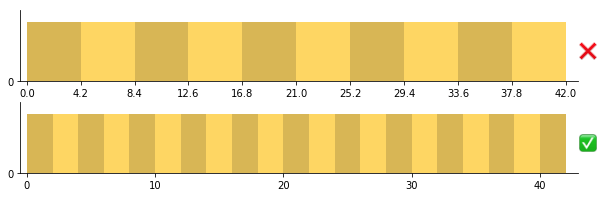

**TO DO**: The dataset has a number of different statistics that describe fuel efficiency. Here, create a _histogram_ that depicts the distribution of carbon Dioxide values taken. Try playing around with different bin width sizes to see what best depicts the data. Define if the distribution is skewed or symmetric.

Make sure you create 2 more histograms based on columns of your choice

In [7]:
data = fuel_econ.co2
skewness = stats.skew(data)
print("Skewness: {}".format(skewness))


Skewness: 0.2902150653489951


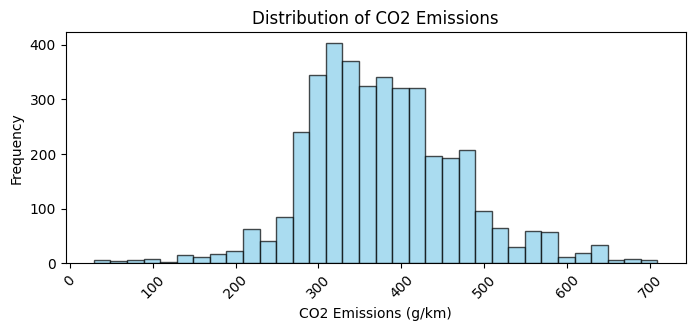

In [8]:
binwidth = 20  # Adjust the binwidth for CO2
plt.figure(figsize=(8,3))
plt.hist(fuel_econ.co2, bins=np.arange(min(fuel_econ.co2), max(fuel_econ.co2) + binwidth, binwidth), edgecolor="black", color='skyblue', alpha=0.7)
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.title('Distribution of CO2 Emissions')
plt.show()



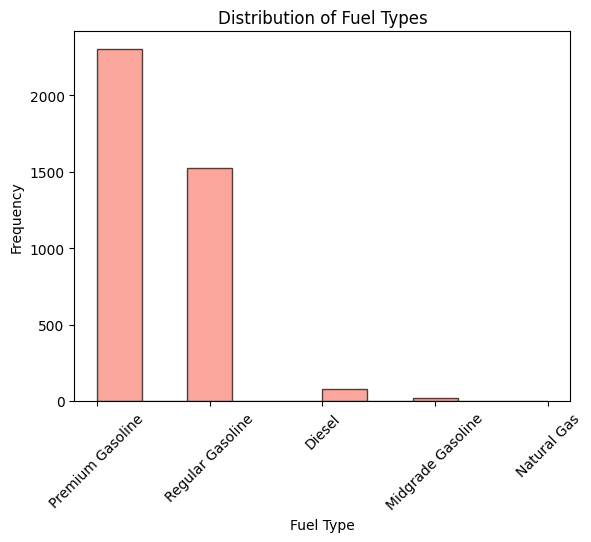

In [9]:
plt.hist(fuel_econ.fuelType, edgecolor="black", color='salmon', alpha=0.7)
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Distribution of Fuel Types')
plt.show()


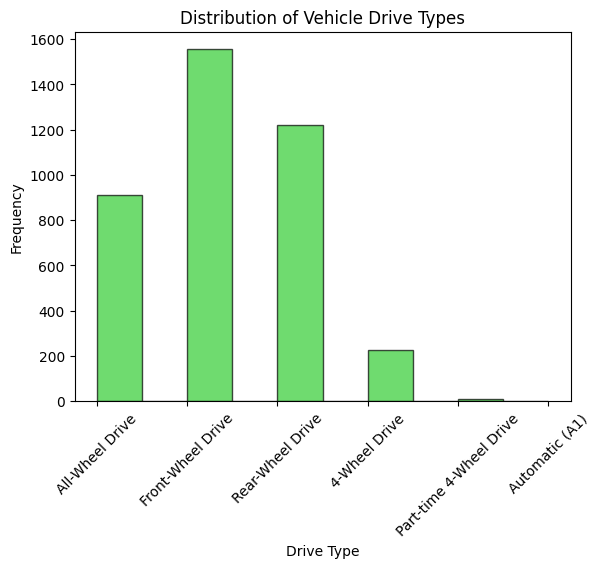

In [10]:
plt.hist(fuel_econ.drive, edgecolor="black", color='limegreen', alpha=0.7)
plt.ylabel("Frequency")
plt.xlabel("Drive Type")
plt.xticks(rotation=45)
plt.title('Distribution of Vehicle Drive Types')
plt.show()

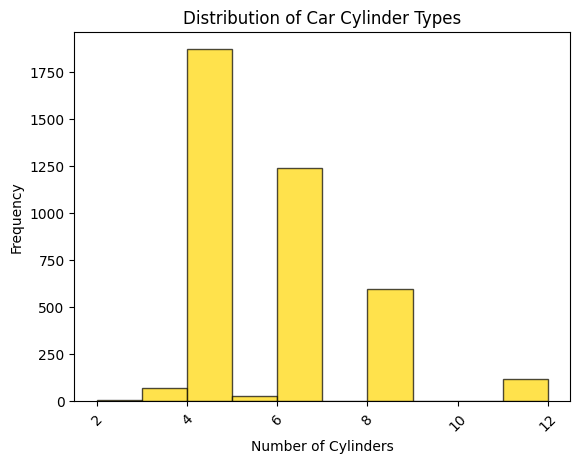

In [11]:
binwidth = 1 
plt.hist(fuel_econ.cylinders, bins=np.arange(min(fuel_econ.cylinders), max(fuel_econ.cylinders) + binwidth, binwidth), edgecolor="black", color='gold', alpha=0.7)
plt.xlabel('Number of Cylinders')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Distribution of Car Cylinder Types')
plt.show()

**TO DO:** create a heat map of engine displacement i.e the column "disp"  vs. co2 production.and interpret it (is there correlation?what did you notice?). Engine Displacement is in litres

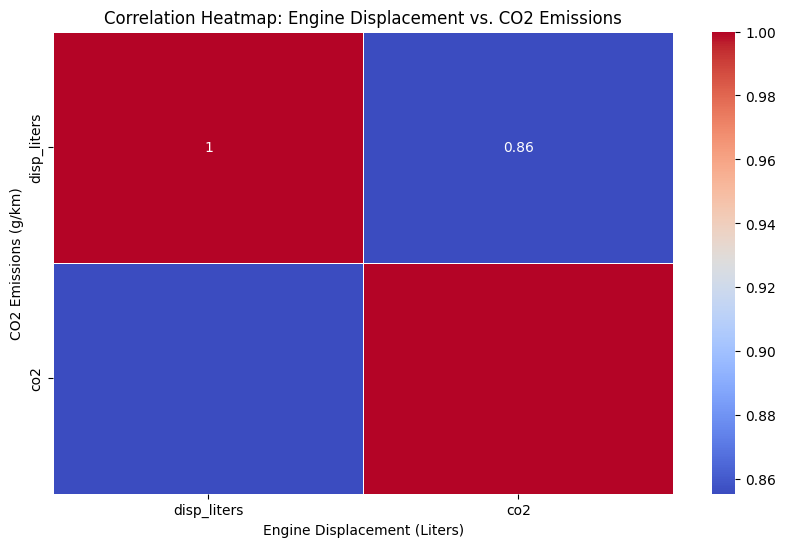

In [12]:
fuel_econ['disp_liters'] = fuel_econ['displ'] * 0.0163871

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=fuel_econ[['disp_liters', 'co2']].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.xlabel('Engine Displacement (Liters)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Correlation Heatmap: Engine Displacement vs. CO2 Emissions')
plt.show()


**TO DO: Write Code that will give you the following plot as follows:**

Finally What Columns would you delete Drop if the target is the ghg score? Justify your Answer

---

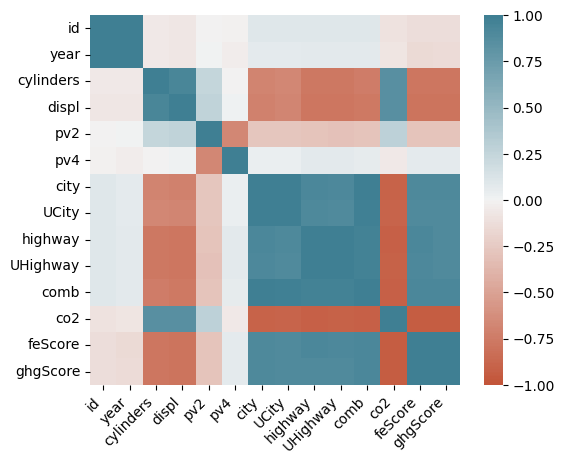

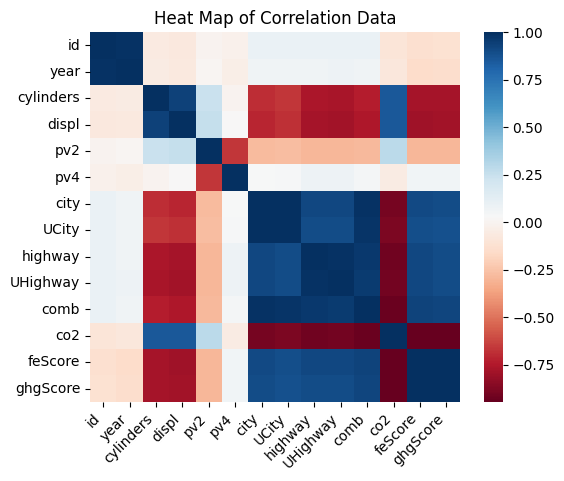

In [13]:
columns = ['id', 'year', 'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway', 'UHighway', 'comb', 'co2', 'feScore', 'ghgScore']

correlation = fuel_econ[columns].corr()

sns.heatmap(correlation, annot=False, cmap='RdBu', square=True)
plt.title('Heat Map of Correlation Data')
plt.xticks(rotation=45, ha='right')
plt.show() 

To prevent collinearity, it is advisable to remove columns that exhibit strong correlations with each other. In this case, columns like 'city,' 'highway,' 'comb,' 'co2,' 'feScore,' and 'UHighway' are candidates for removal. These columns display notably high correlation levels, with correlation coefficients ranging from approximately +0.9 to +1.0.